In [1]:
path="/content/train.csv"

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv(path)
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [5]:
df.shape

(750000, 18)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
age,750000.0,40.926395,10.098829,18.0,33.00,39.0,48.00,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.00,634.0,1390.00,99717.0
day,750000.0,16.117209,8.250832,1.0,9.00,17.0,21.00,31.0
duration,750000.0,256.229144,272.555662,1.0,91.00,133.0,361.00,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.00,2.0,3.00,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.00,-1.0,-1.00,871.0
previous,750000.0,0.298545,1.335926,0.0,0.00,0.0,0.00,200.0
y,750000.0,0.120651,0.325721,0.0,0.00,0.0,0.00,1.0


In [6]:
df.isna().any(axis=1).value_counts()

,count
False,750000


In [7]:
df.duplicated().value_counts()

,count
False,750000


In [8]:
col=df.columns
col

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

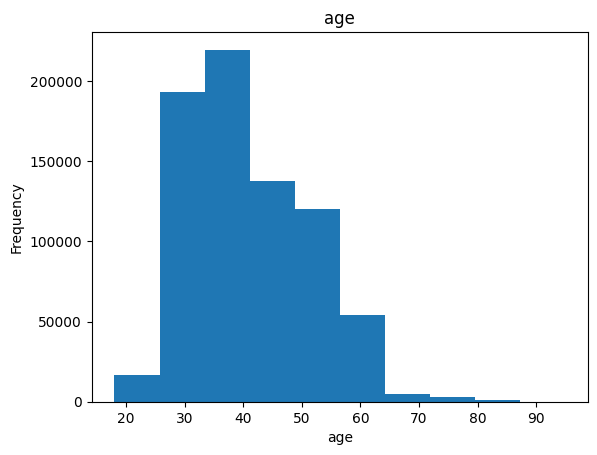

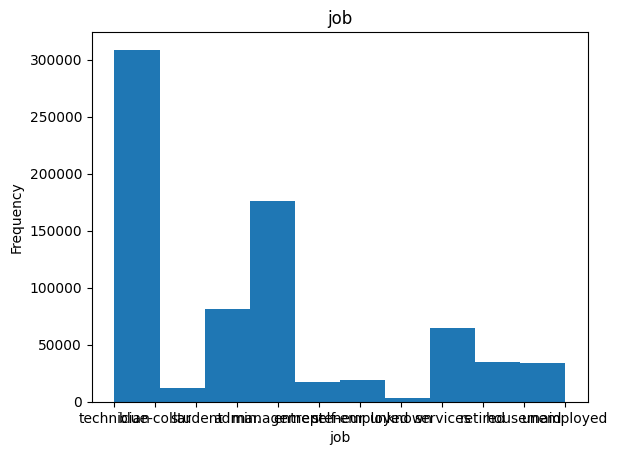

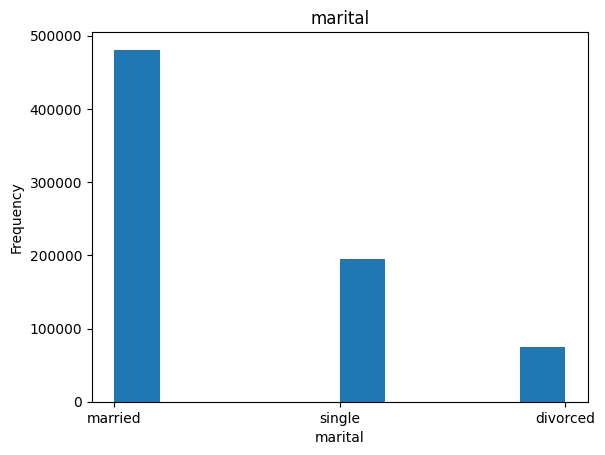

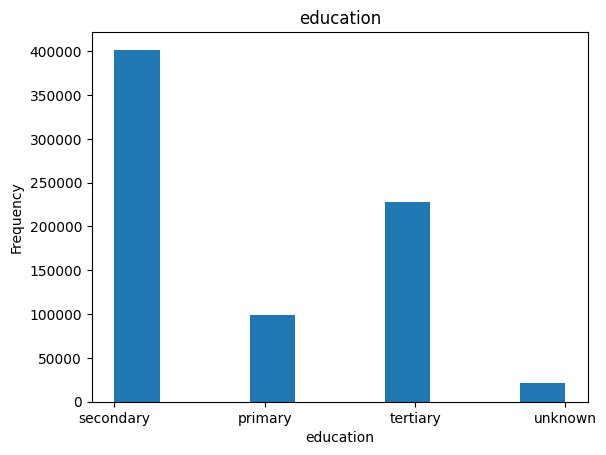

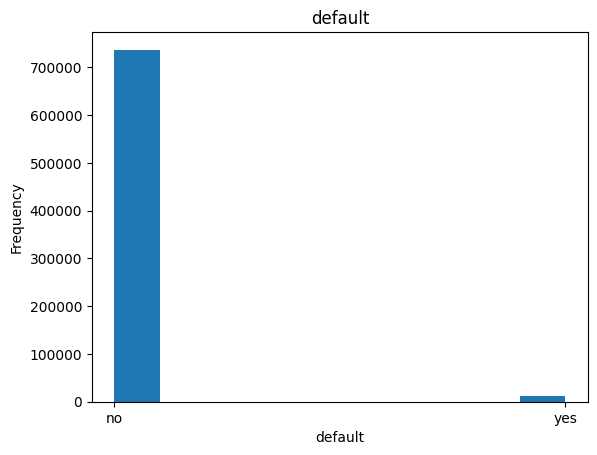

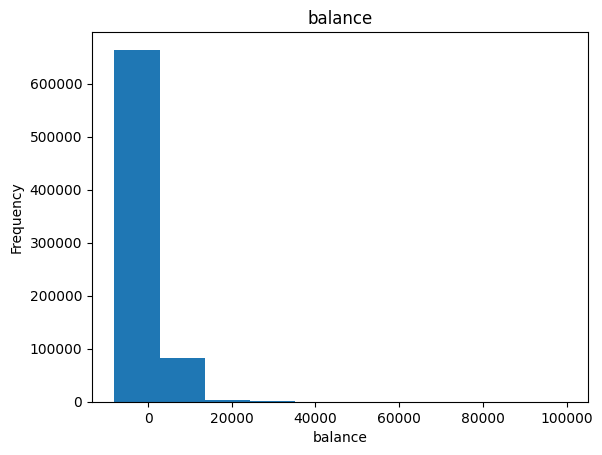

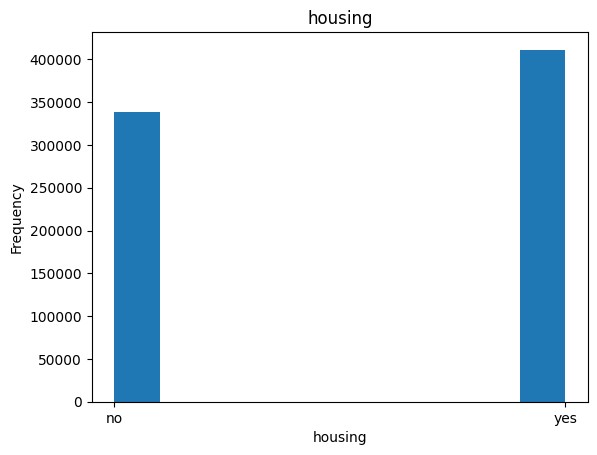

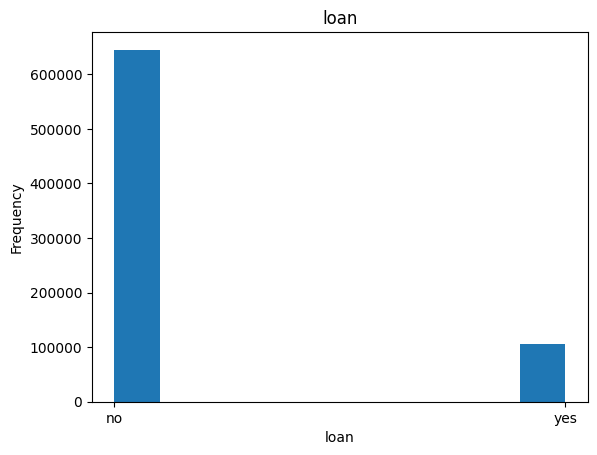

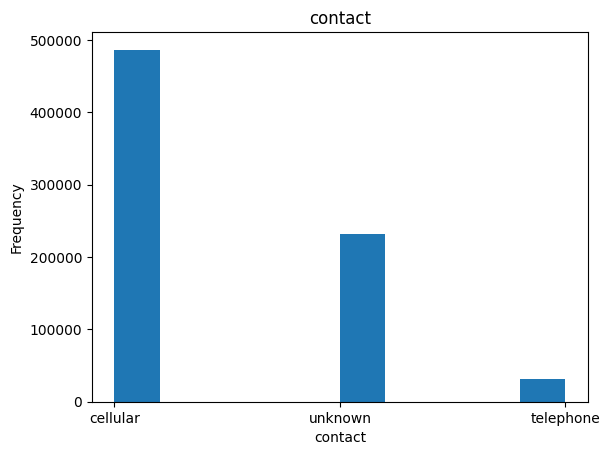

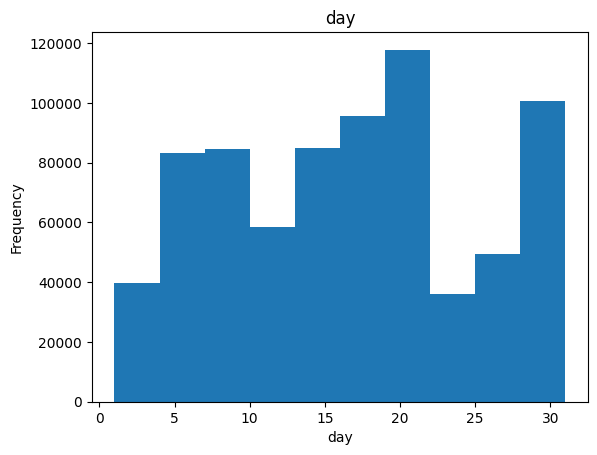

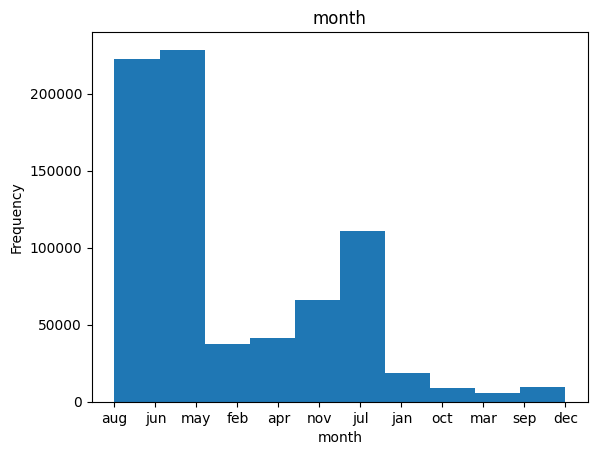

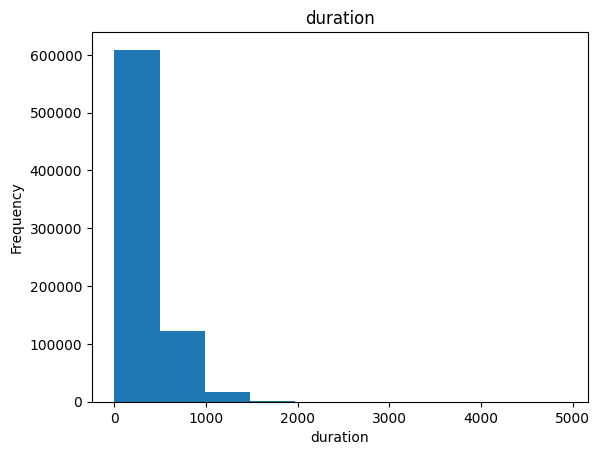

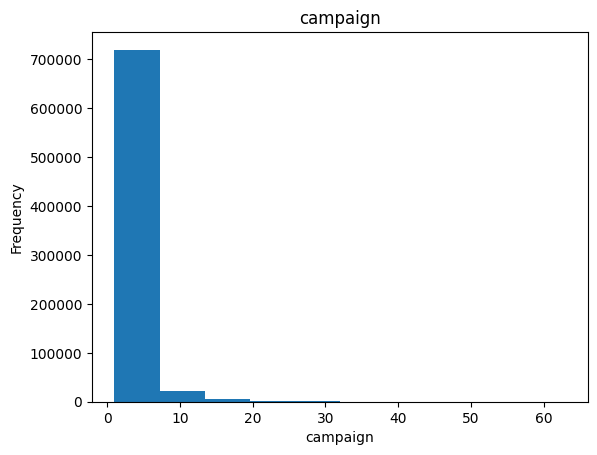

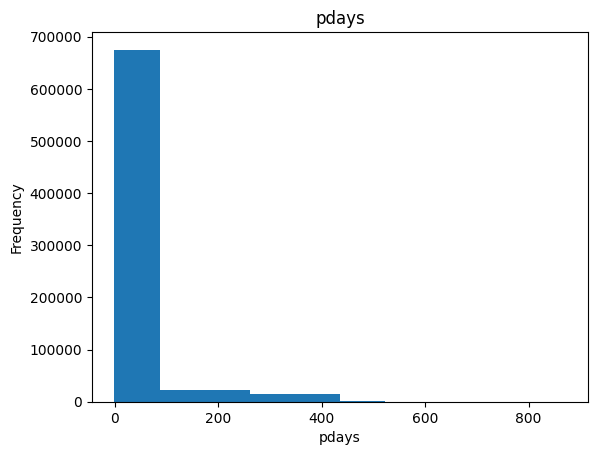

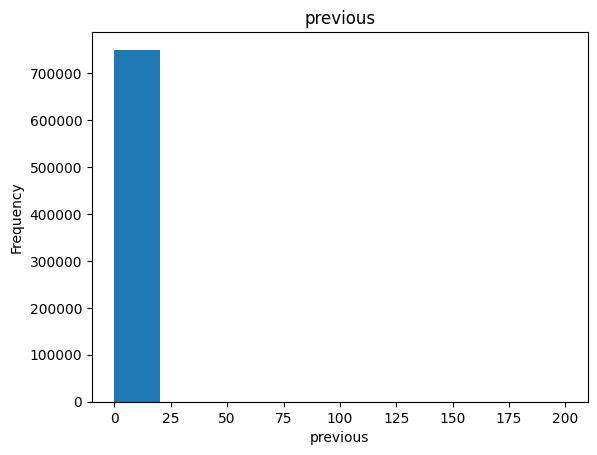

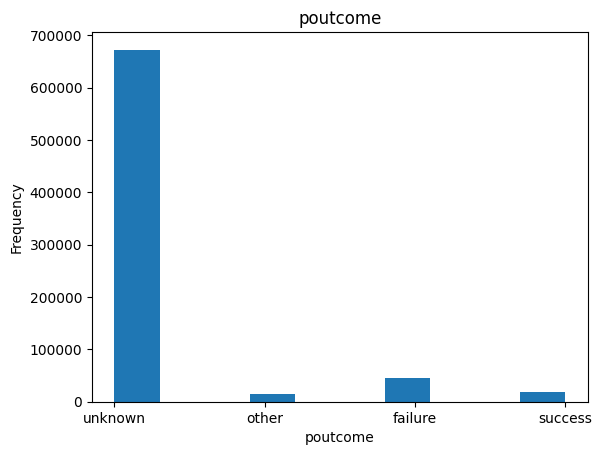

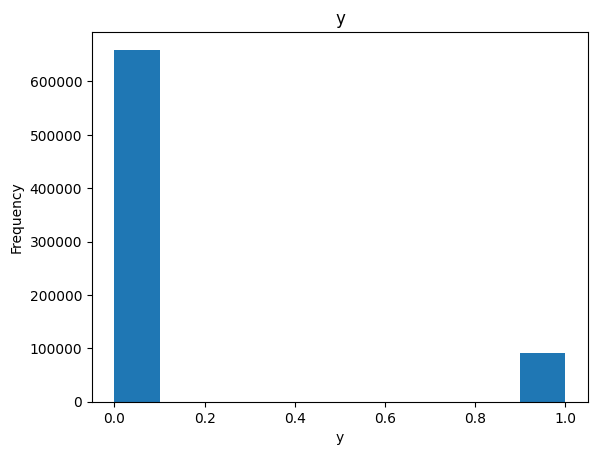

In [9]:
for i in col[1:]:
  plt.hist(df[i])
  plt.title(i)
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()

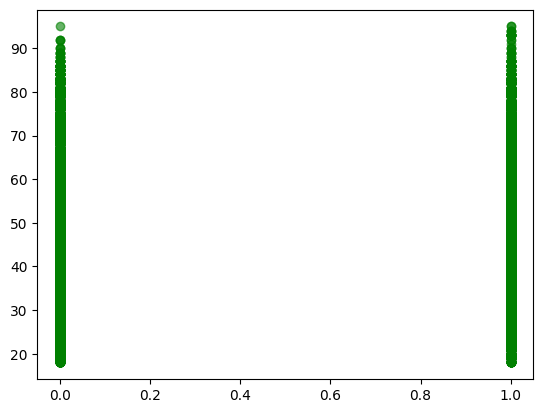

In [15]:
plt.scatter(df['y'],df['age'],color='g',alpha=0.6)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['job','marital','education','default','housing','loan', 'contact','month','poutcome']
def label_encoder(df,cols):
  df[cols]=df[cols].apply(le.fit_transform)
  return df
label_encoder(df,cols)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,7,2,1,0,1282,0,1,2,4,5,1006,2,-1,0,3,1
749996,749996,69,5,0,2,0,631,0,0,0,19,1,87,1,-1,0,3,0
749997,749997,50,1,1,1,0,217,1,0,0,17,0,113,1,-1,0,3,0
749998,749998,32,9,1,1,0,-274,0,0,0,26,1,108,6,-1,0,3,0


In [65]:
from sklearn.model_selection import train_test_split
X=df.drop(['id','y'],axis=1)
y=df['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [43]:
y_pred=gbc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    164716
           1       0.74      0.58      0.65     22784

    accuracy                           0.92    187500
   macro avg       0.84      0.78      0.81    187500
weighted avg       0.92      0.92      0.92    187500



In [67]:
import xgboost as xgb
xgbc=xgb.XGBClassifier()
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [68]:
xgbc_pred=xgbc.predict(X_test)
print(classification_report(y_test,xgbc_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    164716
           1       0.76      0.66      0.71     22784

    accuracy                           0.93    187500
   macro avg       0.86      0.82      0.84    187500
weighted avg       0.93      0.93      0.93    187500



## For equal no. of class

In [72]:
neg, pos = (y == 0).sum(), (y == 1).sum()
scale = neg / pos

model = xgb.XGBClassifier(
    scale_pos_weight=scale,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [73]:
xgbc_pred=xgbc.predict(X_test)
print(classification_report(y_test,xgbc_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    164716
           1       0.76      0.66      0.71     22784

    accuracy                           0.93    187500
   macro avg       0.86      0.82      0.84    187500
weighted avg       0.93      0.93      0.93    187500



In [74]:
# No change in model performace

## Testing

In [40]:
df_test=pd.read_csv("/content/test.csv")
df_test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [41]:
label_encoder(df_test,cols)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,1,1,1,0,1397,1,0,2,21,8,224,1,-1,0,3
1,750001,44,4,1,2,0,23,1,0,0,3,0,586,2,-1,0,3
2,750002,36,6,1,0,0,46,1,1,0,13,8,111,2,-1,0,3
3,750003,58,1,1,1,0,-1380,1,1,2,29,8,125,1,-1,0,3
4,750004,28,9,2,1,0,1950,1,0,0,22,5,181,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,4,1,2,0,0,1,0,0,18,9,65,2,-1,0,3
249996,999996,40,7,1,3,0,522,1,0,0,19,9,531,1,189,1,0
249997,999997,63,5,1,0,0,33,0,0,0,3,5,178,1,92,8,2
249998,999998,50,1,1,0,0,2629,1,0,2,30,8,163,2,-1,0,3


In [70]:
pred=xgbc.predict_proba(df_test.drop(['id'],axis=1))
pred[:,1]

array([1.7431853e-03, 5.4168340e-02, 2.0277302e-04, ..., 8.6430705e-01,
       7.3480076e-04, 1.5300280e-01], dtype=float32)

In [71]:
submission=pd.DataFrame({'id':df_test['id'],'y':pred[:,1]})
submission.to_csv('submission.csv',index=False)